# Predicting heart disease using machine learning

    Python based machine learning model

    1. Problem definition - 1/0 (have/don't have heart_disease), prediction classification model
    2. Data - data are from kaggle (https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease)
    3. Evaluation - if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project (what is our aim of this model)
    4. Features
        **Create data dictionary** (aditional information about data)
        Age: Age
        Sex: Sex (1 = male; 0 = female)
        ChestPain: Chest pain (0 typical, 1 asymptotic, 2 nonanginal, 3 nontypical)
        RestBP: Resting blood pressure
        Chol: Serum cholestoral in mg/dl
        Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        RestECG: Resting electrocardiographic results
        MaxHR: Maximum heart rate achieved
        ExAng: Exercise induced angina (1 = yes; 0 = no)
        Oldpeak: ST depression induced by exercise relative to rest
        Slope: Slope of the peak exercise ST segment
        Ca: Number of major vessels colored by flourosopy (0 - 3)
        Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
        target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)
    5. Modeling
    6. Experimentation


## Preparing the tools

In [1]:
# Import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import models from Sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(df)

303

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.shape

(303, 14)

## Data exploration (EDA)

1. What problem we are trying to solve
2. What kind of data we have and how we treat different types?
3. What missing from a data, and how we deal with it?
4. What are outliers and why we should care about them?
5. How to add, remove, edit features to get more out of data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

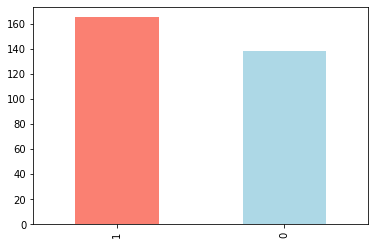

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

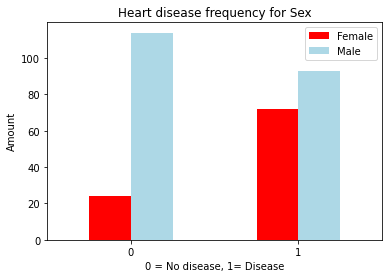

In [16]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["red", "lightblue"])
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0) # rotation numbers on x axis

## Heart disease according to fbs 

In [17]:
pd.crosstab(df.target, df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

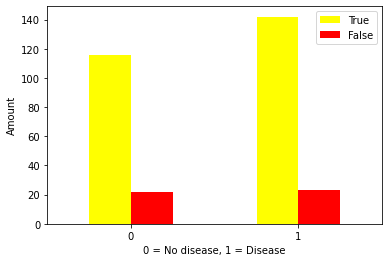

In [18]:
pd.crosstab(df.target, df.fbs).plot(kind="bar", color=["yellow", "red"])
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True", "False"])
plt.xticks(rotation=0)

## Age vs. Max heart disease for heart disease

In [19]:
# Crate a figure
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

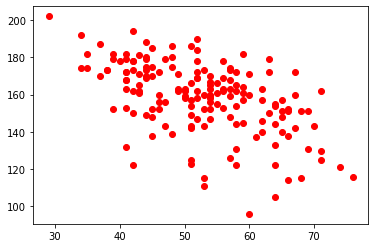

In [20]:
# Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

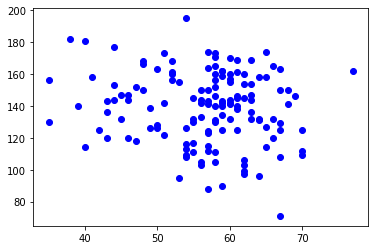

In [21]:
# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

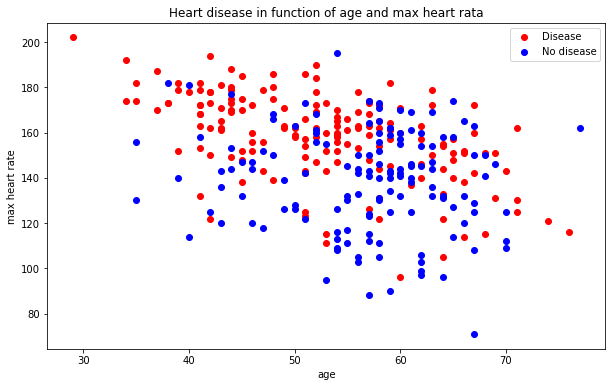

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="red")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="blue")
# Add more info
plt.title("Heart disease in function of age and max heart rata")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Disease", "No disease"])


<AxesSubplot:ylabel='Frequency'>

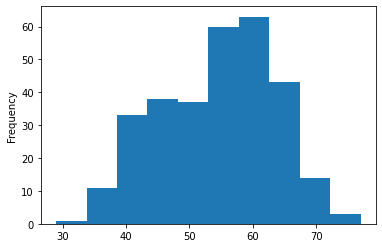

In [23]:
# Check distribution of age colour with hist
df.age.plot.hist()

### Heart Disease frequency per Chest pain type

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


9 cp: chest pain type:

    Value 0: typical angina (related)
    Value 1: atypical angina (not related)
    Value 2: non-anginal pain (not related)
    Value 3: asymptomatic

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

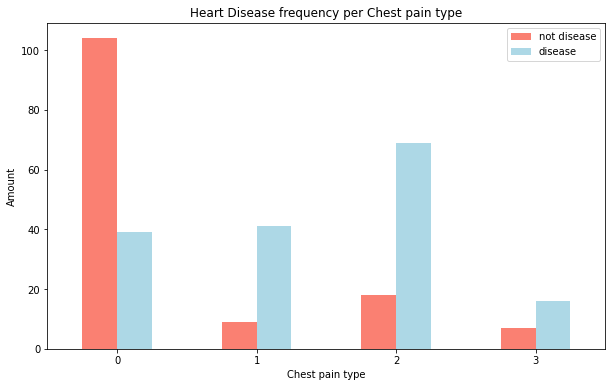

In [25]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease frequency per Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["not disease","disease"])
plt.xticks(rotation=0)

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Make a corelation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


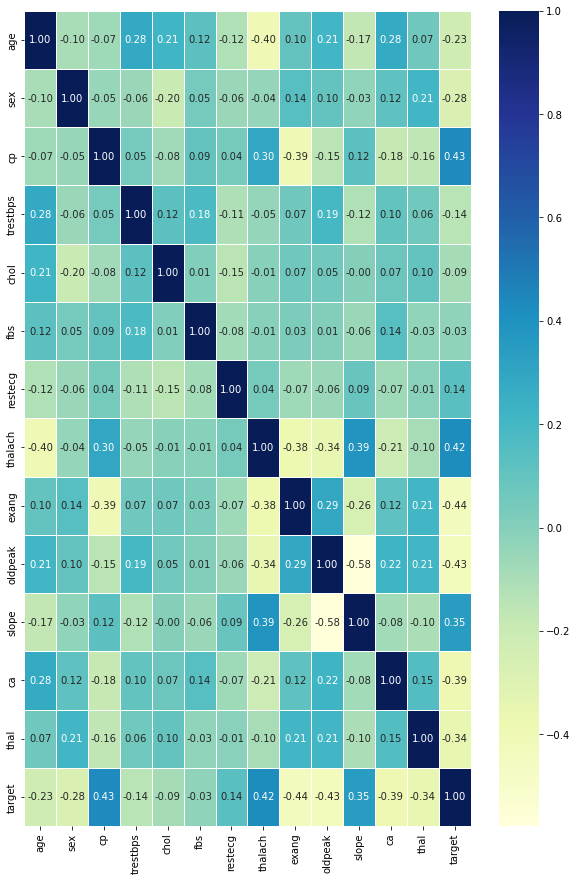

In [28]:
# Make visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                linewidths=0.5,
                fmt = ".2f",
                cmap="YlGnBu")

## 5. Modelling

In [29]:
# Split data into X and y

In [30]:
X = df.drop("target", axis=1)
y = df["target"]

In [31]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train.shape, y_train.shape

((242, 13), (242,))

    We split our data and we'll train it on machine learning models (find the patterns)
    We'll train it on the training set, and test it on test set (use the patterns)
    
    We're going to try 3 machine learning models:
        1. logistic regresion
        2. K-nearest neighbours classifier
        3. random forest classifier
        

In [33]:
# Put models in a dictionary

models= {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different models that we use
    X_train, y_train: features/label which we use to train model
    X_test, y_test: features/label which we use to evaluate model
    """
    #Set Random seed
    np.random.seed(42)
    # Make a dictionary to keep models scores
    model_scores={}
    # Loop trough models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name]=model.score(X_test, y_test)
    return model_scores
        
    

In [34]:
model_scores= fit_and_score(models=models,
                           X_train= X_train,
                           X_test= X_test,
                           y_train= y_train,
                           y_test = y_test)
model_scores

C:\Users\USER\Desktop\project 1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

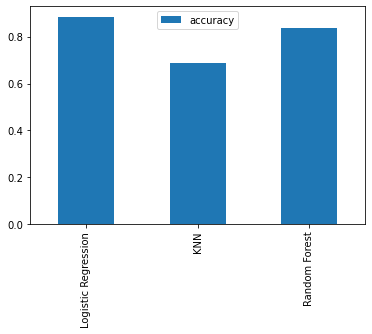

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now we've got baseline model.

        Let's look at following:
        * Hyperparameter tuning
        * Feature importance
        * Confusion matrix
        Caracteristic for classification:
        * Cross validation
        * Precission
        * Recall
        * F1 score
        * Classification report
        * ROC curve
        * Area under the curve (AUC)

## Hyperparameter tuning

In [36]:
# Google it.. How to tune KNN...
train_scores=[]
test_scores=[]

# Create a list of different values n-neighbors

neighbors = range(1, 21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through different n-neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit
    knn.fit(X_train, y_train)
    # Score
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max accuracy of KNN model is:75.41%


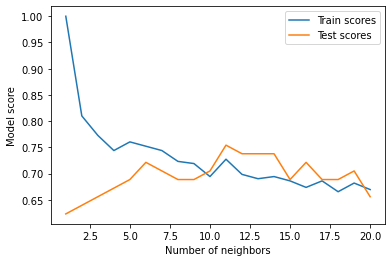

In [39]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Max accuracy of KNN model is:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
    .. using RandomizedSearchCV

In [50]:
# Create a hyperparameter grid for LOgisticRegression()
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Create a hyperparameter grif for RandomForestClassifier()
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5 ,10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":(1, 20, 2)}

In [51]:
# Tune Logistic Regression with RandomizedSearchCV
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [54]:
# Tune Random Forest Classifier with RandomizedSearchCV()
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [61]:
rs_rf.score(X_test, y_test)

0.9836065573770492

## Hyperparameter tuning with GridSearchCV()

* LogisticRegression()

In [69]:
# Different hyperparameter for LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression()

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)
                

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
# CHeack the best one
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
# Evaluate a grid search cv 
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [74]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [75]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\USER\Desktop\project 1\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


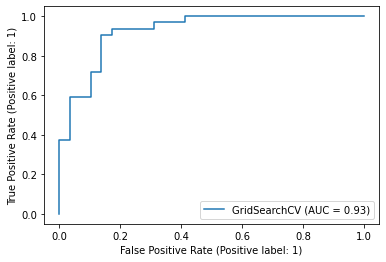

In [77]:
# Import ROC curve function from sklearn.metrics module (we've done it)
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [78]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


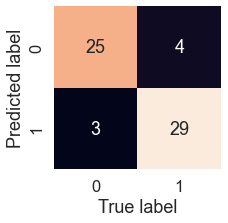

In [82]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confuse matrix using a seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [83]:
print(classification_report(y_test, y_preds)) 
#only on one test split, without cross-validation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using Cross validation

    using cross_val_score()

In [86]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [88]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [93]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [100]:
cv_acc = np.mean(cv_acc)

In [101]:
# Cross validated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_pre)

In [104]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [105]:
# Cross validated F1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1_score = np.mean(cv_f1)
cv_f1_score

0.8673007976269721

In [114]:
# Visualize cross validation matrix
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 score": cv_f1_score},
                           index=[0])

In [115]:
cv_metrics

,Accuracy,Precision,Recall,F1 score
0,0.844699,0.820794,0.921212,0.867301


<AxesSubplot:title={'center':'Cross validated classification metrics'}>

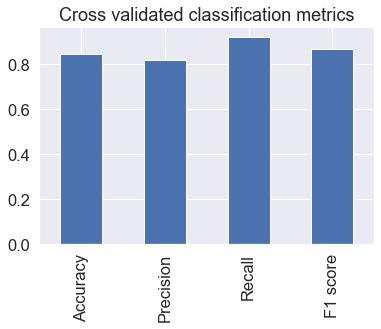

In [117]:
cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                      legend=False)

### Feature importance

Feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contribute"

It is different for every machine learning model

Our model is LogisticRegression model

In [122]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [123]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [126]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [127]:
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

In [129]:
# Visualize a feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

<AxesSubplot:title={'center':'Feature Importance'}>

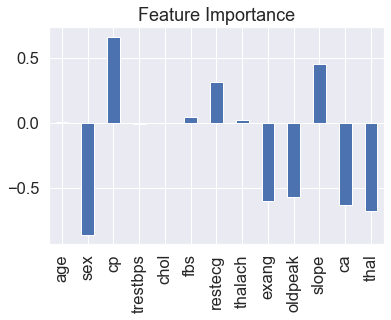

In [132]:
feature_df.T.plot.bar(legend= False,
                      title = "Feature Importance")

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself...

* Could I collect more data?
* Could I try better model?
* Could I improve my model?